In [1]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Here, I have left clues to build a model that predicts danceability of songs using data from the Spotify API. It contains a subset of songs that are available on the platform along with basic characteristics, including tempo, loudness, signature, genre, etc. See details here: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-analysis.

# Goal:
**Complete the fragmented code to build a model that predicts test data with an R2 that is greater than .5.** 
## Nothing should get deleted. You only need to add to the code. 

In [2]:
import pandas as pd

# Loads the sample data
spotify_data = pd.read_csv("spotify_data.csv")

In [3]:
# Display top 5 rows
spotify_data.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,124539,4,Dark Trap
1,0.719,0.493,8,-7.230,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,224427,4,Dark Trap
2,0.850,0.893,5,-4.783,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,98821,4,Dark Trap
3,0.476,0.781,0,-4.710,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,123661,3,Dark Trap
4,0.798,0.624,2,-7.668,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,123298,4,Dark Trap


In [4]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   speechiness       42305 non-null  float64
 5   acousticness      42305 non-null  float64
 6   instrumentalness  42305 non-null  float64
 7   liveness          42305 non-null  float64
 8   valence           42305 non-null  float64
 9   tempo             42305 non-null  float64
 10  type              42305 non-null  object 
 11  id                42305 non-null  object 
 12  duration_ms       42305 non-null  int64  
 13  time_signature    42305 non-null  int64  
 14  genre             42305 non-null  object 
dtypes: float64(9), int64(3), object(3)
memory usage: 4.8+ MB


In [5]:
spotify_data.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580
std,0.156617,0.183823,3.666145,2.941165,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342
min,0.065100,0.000243,0.000000,-33.357000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000
50%,0.646000,0.803000,6.000000,-6.234000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000
75%,0.766000,0.923000,9.000000,-4.513000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000
max,0.988000,1.000000,11.000000,3.148000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000


In [6]:
spotify_data["type"].value_counts()

type
audio_features    42305
Name: count, dtype: int64

In [7]:
spotify_data["genre"].value_counts()

genre
Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: count, dtype: int64

In [8]:
# Drops columns type, id, and genre
spotify_data_for_ml = spotify_data.drop(['type','id','genre'],axis=1)
# Drops the target variable
X = spotify_data_for_ml.drop(['danceability'],axis=1)
# Isolates the target variable 
y = spotify_data_for_ml['danceability']

In [9]:
# complete the code
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.20,random_state=42)

In [10]:
s = StandardScaler()

# scale the train and test data as in the Lecture 1 Notebook.
X_train_scaled = pd.DataFrame(s.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(s.fit_transform(X_test), columns = X_test.columns)

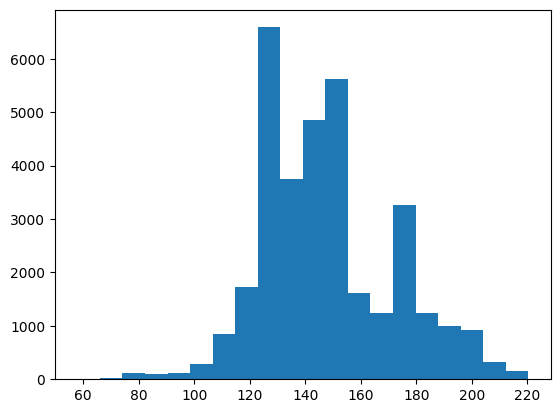

In [11]:
import matplotlib.pyplot as plt
#from pandas.plotting import scatter_matrix

plt.hist(X_train["tempo"], bins=20)
plt.show()

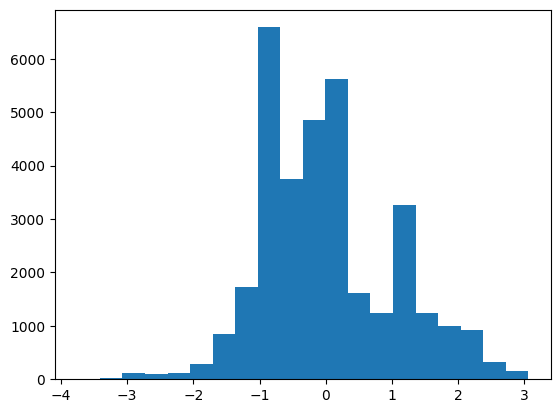

In [12]:
plt.hist(X_train_scaled["tempo"], bins=20)
plt.show()

In [13]:
X_train.describe()

,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,33844.000000,33844.000000,33844.000000,33844.000000,33844.000000,33844.000000,33844.000000,33844.000000,33844.000000,33844.000000,33844.000000
mean,0.762889,5.383968,-6.468434,0.136532,0.095660,0.285237,0.214269,0.357271,147.408835,251280.702872,3.973171
std,0.183364,3.660711,2.921052,0.126349,0.170686,0.371730,0.176104,0.233625,23.837533,103325.799073,0.268050
min,0.000243,0.000000,-33.357000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000
25%,0.632000,1.000000,-8.159000,0.049100,0.001690,0.000000,0.099600,0.161000,129.862500,179939.750000,4.000000
50%,0.803000,6.000000,-6.246000,0.075400,0.016400,0.006150,0.135000,0.321000,144.964500,224813.000000,4.000000
75%,0.922000,9.000000,-4.524000,0.193000,0.106000,0.726250,0.294000,0.522000,161.145000,301925.500000,4.000000
max,1.000000,11.000000,3.108000,0.944000,0.987000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000


In [14]:
# Notice how each feature has mean = 0 and std = 1
X_train_scaled.describe()

,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,3.384400e+04,3.384400e+04,3.384400e+04,3.384400e+04,3.384400e+04,3.384400e+04,3.384400e+04,3.384400e+04,3.384400e+04,3.384400e+04,3.384400e+04
mean,-1.264927e-16,1.116915e-16,-1.945154e-16,-1.911562e-16,1.989243e-17,1.014041e-16,-1.217689e-16,3.611079e-17,1.023384e-15,-9.510574e-17,3.489310e-16
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-4.159259e+00,-1.470766e+00,-9.205233e+00,-9.009452e-01,-5.604431e-01,-7.673343e-01,-1.155973e+00,-1.449228e+00,-3.752199e+00,-2.184198e+00,-1.109203e+01
25%,-7.138319e-01,-1.197591e+00,-5.787610e-01,-6.919975e-01,-5.505480e-01,-7.673343e-01,-6.511510e-01,-8.401244e-01,-7.360910e-01,-6.904569e-01,1.000911e-01
50%,2.187545e-01,1.682847e-01,7.614971e-02,-4.838413e-01,-4.643653e-01,-7.507897e-01,-4.501306e-01,-1.552570e-01,-1.025429e-01,-2.561615e-01,1.000911e-01
75%,8.677474e-01,9.878098e-01,6.656721e-01,4.469258e-01,6.058185e-02,1.186400e+00,4.527577e-01,7.051075e-01,5.762496e-01,4.901539e-01,1.000911e-01
max,1.293138e+00,1.534160e+00,3.278468e+00,6.390855e+00,5.222172e+00,1.893242e+00,4.393666e+00,2.699784e+00,3.057457e+00,6.404800e+00,3.830799e+00


In [15]:
# add in the data, etc using the Lecture 1 Notebook as a reference. 
# use help(KNeighborsRegressor()) to see the ways to tune the model, improving the R2. 
# for example, below, we are tuning n_neighbors but there is one key change to another hyperparameter we
# could look to make as well. Experiment until you get the R2 > .5. 

from sklearn.metrics import mean_squared_error
import numpy as np

results = {}
for i in np.linspace(3, 25, 5, dtype = int):
    knn_model = KNeighborsRegressor(n_neighbors=i, weights='distance')
    knn_model.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)
    results[i] = (mean_squared_error(y_test, y_pred),knn_model.score(X_test_scaled, y_test))
performance = pd.DataFrame.from_dict(results, orient = "index", columns = ["MSE","R2"])

In [16]:
performance

,MSE,R2
3,0.011928,0.521038
8,0.010586,0.574936
14,0.010270,0.587633
19,0.010308,0.586093
25,0.010394,0.582657


# Result

In [17]:
# eval the performance
# performance
(performance["R2"] > .500).any()

True